<!--NOTEBOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="./figures/LogoOpenclassrooms.png">
<font size="4">
    
Cette étude a été réalisée dans le cadre du 6ème projet de ma formation Datascientist dispensée en MOOC par 

<font color='blus'>Openclassrooms / écoles Centrale-Supélec</font>.




<p></p><p></p><p></p>





**Le problème posé :**

# <font color='blus'>Indexation d'images</font>

Vous êtes bénévole pour l'association de protection des animaux de votre quartier. C'est d'ailleurs ainsi que vous avez trouvé votre compagnon idéal, Snooky. Du coup, vous vous demandez ce que vous pouvez faire en retour pour aider l'association.

Vous apprenez, en discutant avec un bénévole, que leur base de données de pensionnaires commence à s'agrandir et qu'ils n'ont pas toujours le temps de référencer les images des animaux qu'ils ont accumulées depuis plusieurs années. Ils aimeraient donc réaliser un index de l’ensemble de la base de données d’images qu’ils possèdent, pour classer les chiens par races.

**<font color='blus'>Les données</font>**

Les bénévoles de l'association n'ont pas eu le temps de réunir les différentes images des pensionnaires dispersées sur leurs disques durs. Pas de problème, vous développerez un algorithme en utilisant le Stanford Dogs Dataset pour entraîner votre algorithme.

**<font color='blus'>Votre mission</font>**

En tant que Data Scientist, l'association vous demande de réaliser un algorithme de détection de la race du chien sur une photo, afin d'accélérer leur travail d’indexation.

**<font color='blus'>Contraintes</font>**

Lors de ce projet, vous mettrez en œuvre deux approches.

* Une approche classique : il s’agit de pre-processer des images avec des techniques spécifiques (e.g.whitening, equalisation, filtre linéaire/laplacien/gaussien, éventuellement modifier la taille des images), puis d’extraire des features (e.g. texture, corners, edges et SIFT detector). Il faut ensuite réduire les dimensions, soit par des approches classiques (e.g. PCA, k-means) soit avec une approche par histogrammes et dictionary learning (bag-of-words appliqué aux images), puis appliquer des algorithmes de classification standards.



* Lors de l’analyse exploratoire, vous regarderez si les features extraites et utilisées en classification sont prometteuses en utilisant des méthodes de réduction de dimension pour visualiser le dataset en 2D. Cela vous permettra d’affiner votre intuition sur les différents traitements possibles, sans que cela ne se substitue à des mesures de performances rigoureuses.



* Une approche s’appuyant sur l’état de l’art et l’utilisation de CNN (réseaux de neurones convolutionnels). Compte tenu de la taille et de la complexité du dataset, et de la puissance de calcul à votre disposition, il est très difficile d’obtenir de bonnes performances (pour ça, essayez MNIST). Aussi, est-il recommandé d’utiliser le transfer learning, c’est-à-dire utiliser un réseau déjà entraîné, et le modifier pour répondre à votre problème. Une première chose obligatoire est de ré-entraîner les dernières couches pour prédire les classes qui vous intéressent seulement. Il est également possible d’adapter la structure (supprimer certaines couches par exemple) ou de ré-entraîner le modèle avec un très faible learning rate pour ajuster les poids à votre problème (plus long) et optimiser les performances.

**Séance du 10/01/2019**

    *M.L: esperer obtenir 30 a 50% de résultats selon la taille des observations
    *% images : demarrer 10 races avec 20 à 30 images par race.
    *On peut esperer avoir qques résultats.

W sur echantillon aléatoire et un autre avec intervention humaine.
Filtrage des images :
 filtrage adaptatif par bloc : filtre qui glisee sur l'image et quantification de la texture par bloc.
 ==> différence de texture entre l'objet principal et background;
 Caractéristiques discriminantes de l'objet proncipal.
 **Pre-traitement : trouver un filtre qui améliore les contrastes du contour.**
 
 
 W sur blocs d'images pour faire des filtres. Construire les descripteurs au niveau des blocs.
 

D.L. esperer de meilleurs résultats.



In [2]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

#### New version of  `oP7_DataBreed` instance is updated and dumped

When class `P7_DataBreed` is upaded, this lead to update methods and attributes.
While attributes does not exists in old version of `P7_DataBreed`, this process allows 
to create an instance of latest version of `P7_DataBreed` class, update new attributes values and dump it.

* Fist step : save 
    * Copy of `oP7_DataBreed` holds new methods.
    * New attributes that does not exists into old version of `oP7_DataBreed` are masked into copy process
* Second step : new attributes update
    * Original instance of `oP7_DataBreed` is created; this instance hold new methods and new attributes.
    * Saved instance of new version from `P7_DataBreed` is copied back into original instance.
* Third step : backup of new instance 
    * New instance of `oP7_DataBreed` with new methods and updated attributes is dumped into a file.

In [441]:
import pandas as pd
import numpy as np

# New attribute is created with an updated value
new_attribute = pd.DataFrame()
new_attribute = np.array(0).copy()
new_attribute = dict()
new_attribute = True
new_attribute = np.array(128).copy()

In [178]:
import shutil
filename = './data/oP7_DataBreed.dump'
#-------------------------------------------------------------------------------------------------------
# Save already dumped file
#-------------------------------------------------------------------------------------------------------
shutil.copyfile(filename, './data/oP7_DataBreed_save.dump')


'./data/oP7_DataBreed_save.dump'

In [442]:
import p5_util
import P7_DataBreed
filename = './data/oP7_DataBreed.dump'
    
if new_attribute is not None :

    #-------------------------------------------------------------------------------------------------------
    # Create a copy of P7_DataBreed and save the copy.
    # Copy of P7_DataBreed holds new methods.
    # New attributes that does not exists into old version of oP7_DataBreed are masked into copy process
    #-------------------------------------------------------------------------------------------------------
    oP7_DataBreed_save = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed_save.copy(oP7_DataBreed, is_new_attribute=False)
    p5_util.object_dump(oP7_DataBreed_save,filename)
    oP7_DataBreed_save.show(legend='Old version')

    #-------------------------------------------------------------------------------------------------------
    # An original instance oP7_DataBreed is created; this instance hold new methods and new attributes.
    # Copy of P7_DataBreed is copied back into original instance.
    # New attributes that does not exists into old version of oP7_DataBreed are masked into copy process
    #-------------------------------------------------------------------------------------------------------
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)

    #-------------------------------------------------------------------------------------------------------
    # New attributes values are updated if required
    #-------------------------------------------------------------------------------------------------------
    oP7_DataBreed.Xdesc = new_attribute

    #-------------------------------------------------------------------------------------------------------
    # New instance of oP7_DataBreed with new attributes and new methods is saved
    #-------------------------------------------------------------------------------------------------------
    filename = './data/oP7_DataBreed.dump'
    p5_util.object_dump(oP7_DataBreed,filename)
    #print('')
    oP7_DataBreed.show(legend='New version')

    del(oP7_DataBreed_save)


*** WARN : new attributes from object are not copied on target!


 Old version
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Descriptors count ........ : 3909
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (128,)

*** WARN : method not authorized !


 New version
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
St

#### After update of code into `P7_DataBreed` for unmasking copy of new attributes, execute following cell

In [443]:
import p5_util
import P7_DataBreed
if new_attribute is not None :
    filename = './data/oP7_DataBreed.dump'
    oP7_DataBreed_save = p5_util.object_load(filename)
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)
    p5_util.object_dump(oP7_DataBreed,filename)
    del(oP7_DataBreed_save)
    oP7_DataBreed.show()
    new_attribute = None

p5_util.object_load : fileName= ./data/oP7_DataBreed.dump

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Descriptors count ........ : 3909
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (128,)


**Execute following cell in order to update object version with no change in attributes**

* A backup instance of object is created. This backup instance is empty.
* If object instance is not defined then it is read from dmped file.
* object instance is copied back into backup instance
* Backup instance is deleted

In [368]:
new_attribute

In [209]:
import p5_util
import P7_DataBreed
if new_attribute is None :
    is_saved = True
    filename='./data/oP7_DataBreed.dump'
    oP7_DataBreed_save = P7_DataBreed.P7_DataBreed()
    try: 
        oP7_DataBreed
    except NameError:
        print('*** INFO : oP7_DataBreed is not defined; loading...')
        oP7_DataBreed = p5_util.object_load(filename)
        is_saved = False
    oP7_DataBreed_save.copy(oP7_DataBreed)
    oP7_DataBreed = P7_DataBreed.P7_DataBreed()
    oP7_DataBreed.copy(oP7_DataBreed_save)
    del(oP7_DataBreed_save)
    oP7_DataBreed.show()
    is_saved=False
    if is_saved is True:
        print('*** INFO : oP7_DataBreed is saved')
        p5_util.object_dump(oP7_DataBreed,filename)



 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)
Number of breeds .............. : 0


# <font color='blus'>1. Analysis with sampled dataset</font>

## <font color='blus'>1.0. Filters exploration</font>

In [169]:
oP7_DataBreed.show()

Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)


In [220]:
oP7_DataBreed.build_dict_breedname_id()
oP7_DataBreed.show()
#oP7_DataBreed.dict_breedname_id
oP7_DataBreed.breed_show()

Building...

 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)
Number of breeds .............. : 7

Identifier= n02107142  Breed name= Doberman
Identifier= n02116738  Breed name= African_hunting_dog
Identifier= n02105162  Breed name= malinois
Identifier= n02113799  Breed name= standard_poodle
Identifier= n02115641  Breed name= dingo
Identifier= n02109525  Breed name= Saint_Bernard
Identifier= n02108089  Breed name= boxer


In [448]:
breedname = 'Doberman'

oP7_DataBreed.show_image_name(breedname)

In [315]:
import p7_util
import image_slicer

image_name = 'n02107142_16400.jpg'
pathfilename = oP7_DataBreed.get_image_filename(breedname,image_name)
pathfilename

'./data/EasyImages/n02107142-Doberman/n02107142_16400.jpg'

In [336]:
image_pil = p7_util.p7_pil_image_load(pathfilename\
                    ,is_verbose=False, std_size=None)

In [337]:
image_pil_transformed = ImageOps.autocontrast(ImageOps.grayscale(image_pil).resize((200,200)))

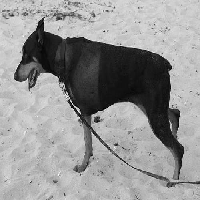

In [338]:
image_pil_transformed

In [449]:
dict_image_pil_splited = oP7_DataBreed.split_pil_image(image_pil_transformed,breedname)

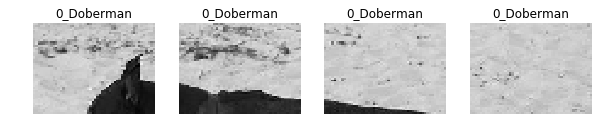

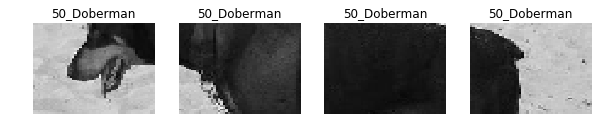

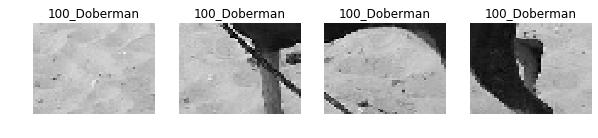

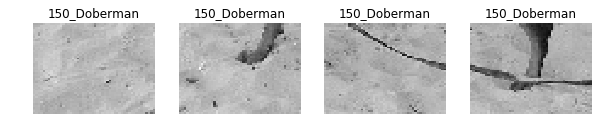

In [450]:
import p7_util
p7_util.p7_image_pil_show(dict_image_pil_splited,std_image_size=(500,375))

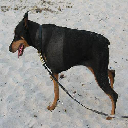

In [310]:
from PIL import ImageOps
image_pil = image_pil.resize(oP7_DataBreed.std_size)
image_pil_128=image_pil.resize((128,128))
ImageOps.autocontrast(image_pil_128)
ImageOps.crop(image_pil_128)

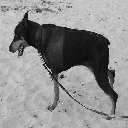

In [311]:
ImageOps.grayscale(image_pil_128)

## <font color='blus'>1.1. Loading the whole dataset</font>

In [94]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed()
oP7_DataBreed.load()
oP7_DataBreed.resize()
oP7_DataBreed.show()


Path to data directory ........ : ./data/Images
Number of breeds .............. : 120
Total number of images ........ : 20580
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 0


## <font color='blus'>1.2. Sampling the dataset</font>

In [ ]:
breed_count=10
image_per_breed_count=4
oP7_DataBreed.sampling(breed_count, image_per_breed_count)

## <font color='blus'>1.3. Building descriptors</font>

In [371]:
import P7_DataBreed
oP7_DataBreed.std_size=(200,200)
oP7_DataBreed.build_sift_desc(is_splitted=True)
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Descriptors count ........ : 3909
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)
Number of breeds .............. : 7
Image splitted ................ : True


### Analysis of 2 images from a breed

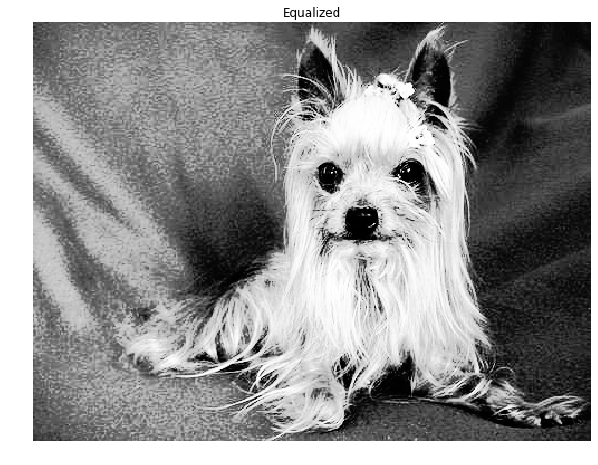

In [209]:
import p7_util
import P7_DataBreed

dirbreed = './data/Images/n02094433-Yorkshire_terrier'
list_image_name = ['n02094433_3947.jpg','n02094433_8535.jpg']

dict_pil_image = P7_DataBreed.process_breed_sample(dirbreed, list_image_name, oP7_DataBreed.std_size)
dict_pil_image_display = dict()
dict_pil_image_display['Equalized'] = dict_pil_image['equalize'][1]
#p7_util.p7_image_pil_show(dict_pil_image_display,std_image_size=None)

`dict_pil_image_equalize` and `dict_breed_kpdesc` are built from `P7_DataBreed.get_image_kpdesc`

#### Descriptors for 2 images contained in a list are built

In [213]:
import P7_DataBreed

list_image_pil = list()
dict_pil_image_equalize = dict()
list_kpdesc = list()
for list_pil_image in dict_pil_image['equalize']:
    for pil_image_equalize in list_pil_image :
        list_image_pil.append(pil_image_equalize)
        kp, desc = P7_DataBreed.get_image_kpdesc(pil_image_equalize)
        list_kpdesc.append((kp, desc))
dict_pil_image_equalize={'Yorkshire_terrier':list_image_pil}
dict_breed_kpdesc={'Yorkshire_terrier':list_kpdesc}

In [229]:
type(dict_breed_kpdesc['Yorkshire_terrier'][0][1])
dict_breed_kpdesc['Yorkshire_terrier'][0][1].shape,dict_breed_kpdesc['Yorkshire_terrier'][1][1].shape

((405, 128), (1881, 128))

#### Dictionaries for drawing invariant Key points is built

In [214]:
import cv2
dict_breed_kpdesc_image = dict()
for (breed, list_breed_kpdesc), list_image_pil in zip(dict_breed_kpdesc.items(), dict_pil_image_equalize.values()):
    dict_breed_kpdesc_image[breed] = [cv2.drawKeypoints(np.array(image_pil), kp, np.array(image_pil)) \
                             for ((kp, desc),image_pil) in zip(list_breed_kpdesc,list_image_pil)]



#### Key points are drawned along with images

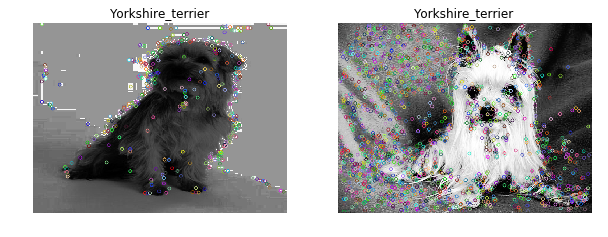

In [215]:
import p7_util
p7_util.p7_image_pil_show(dict_breed_kpdesc_image,std_image_size=None)


Those pictures show that uniform background leads Key points to be focused on dog border and dog details

#### Drawing matches

In [199]:
# list_kpdesc contains tuples (kp,desc)
kp1 = list_kpdesc[0][0]
kp2 = list_kpdesc[1][0]
desc1 = list_kpdesc[0][1]
desc2 = list_kpdesc[1][1]
image_pil_gray_equalized1 = dict_pil_image['equalize'][0][0]
image_pil_gray_equalized2 = dict_pil_image['equalize'][1][0]

In [203]:
import cv2

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2SQR, crossCheck=True)
# Match descriptors.
matches = bf.match(desc1,desc2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

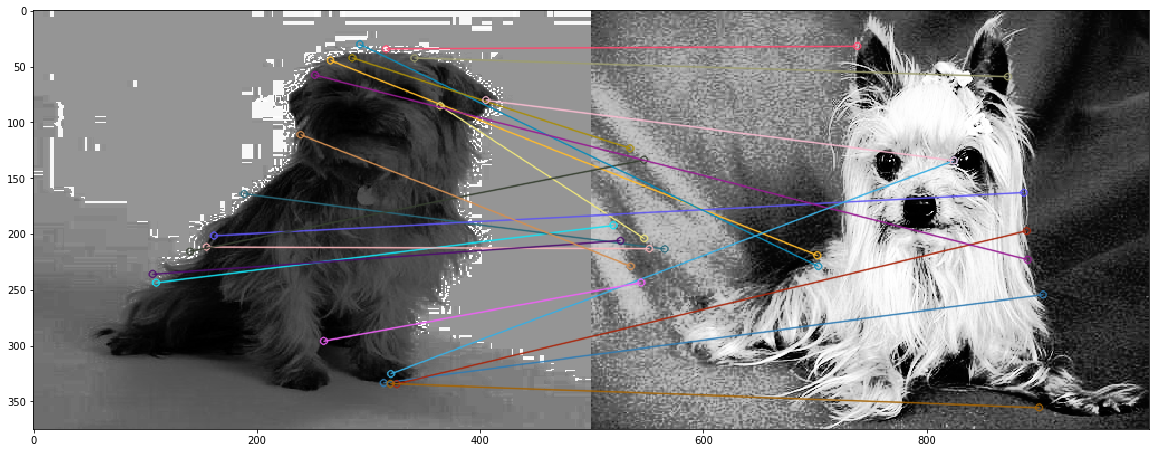

In [217]:
import cv2
import matplotlib.pyplot as plt
image_pil_gray_equalized3 = image_pil_gray_equalized1
# Draw first 10 matches.
image_pil_gray_equalized3 = cv2.drawMatches(np.array(image_pil_gray_equalized1),kp1\
                                           ,np.array(image_pil_gray_equalized2),kp2\
                                            ,matches[:20],np.array(image_pil_gray_equalized3), flags=2)

plt.figure(figsize=(20,10))
z_=plt.imshow(image_pil_gray_equalized3),plt.show()

# <font color='blus'>2. Analysis with images filtered by hand</font>

## <font color='blus'>2.1. Loading the whole dataset</font>

In [233]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed('./data/EasyImages')
oP7_DataBreed.load()
oP7_DataBreed.resize()

oP7_DataBreed.show()

Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 0
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0


## <font color='blus'>2.2. Sampling the dataset</font>

In [234]:
breed_count=10
image_per_breed_count=5
oP7_DataBreed.sampling(breed_count, image_per_breed_count)

oP7_DataBreed.build_sift_desc()
oP7_DataBreed.show()

Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
X train size .................. : 0
y train size .................. : 0
X test size ................... : 0
y test size ................... : 0


## <font color='blus'>2.3. GMM clustering</font>

### Bilding array of all Key points descriptors

In [444]:
oP7_DataBreed.build_arr_desc()

Processed raws= 1000/3909
Processed raws= 2000/3909
Processed raws= 3000/3909

*** WARN : Nb of exceptions during process ... : 366


In [452]:
oP7_DataBreed.show()


 
Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (200, 200)
SIFT Descriptors count ........ : 3909
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)
Number of breeds .............. : 7
Image splitted ................ : True
Key point descriptors ......... : (111260, 128)



In [ ]:
import p5_util
import P7_DataBreed

df_desc = oP7_DataBreed.df_desc
cluster_start = 1
cluster_end = 20

dict_hyper_parameter={'covariance_type':['diag','spherical','full']}
#dict_hyper_parameter={'covariance_type':['full']}
t_range_cluster = (cluster_start, cluster_end)
dict_list_gmm_model = p5_util.gmm_hyper_parameter_cv(df_desc, t_range_cluster ,dict_hyper_parameter)

In [458]:
filename='./data/dict_list_gmm_model_'+str(cluster_end)+'_splited_clusters.dump'
p5_util.object_dump(dict_list_gmm_model,filename)

p5_util.object_load : fileName= ./data/dict_list_gmm_model_20_clusters.dump


<Figure size 1008x504 with 0 Axes>

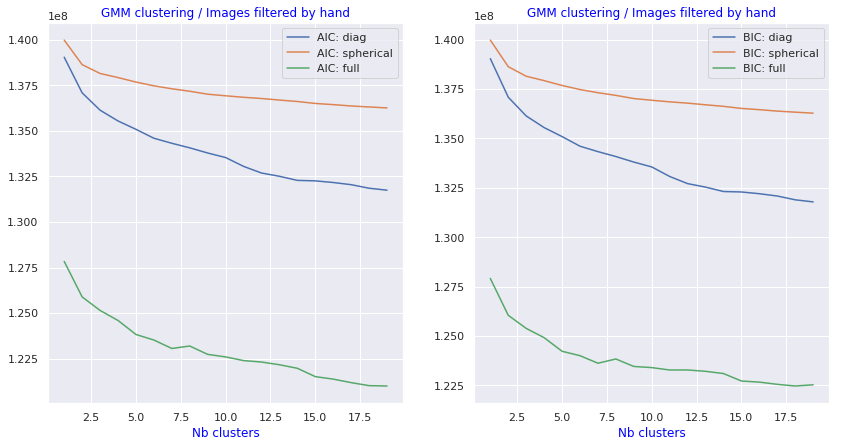

In [456]:
import p5_util
import p5_util_plot

filename='./data/dict_list_gmm_model_'+str(cluster_end)+'_clusters.dump'
dict_list_gmm_model = p5_util.object_load(filename)

p_figsize = (14,7)
t_range_cluster = (cluster_start, cluster_end)
p_title = 'GMM clustering / Images filtered by hand'
p5_util_plot.gmm_models_plot_AIC_BIC(df_desc, dict_list_gmm_model, t_range_cluster, p_figsize, p_title)

In [457]:
df_desc = oP7_DataBreed.df_desc
df_desc.shape

(111260, 128)

In [460]:
import p5_util
df_desc = oP7_DataBreed.df_desc
dict_dict_silhouette_score = p5_util.gmm_silhouette_compute(df_desc, dict_list_gmm_model)

filename = './data/dict_dict_silhouette_score_20_splitted_breeds.dump'
p5_util.object_dump(dict_dict_silhouette_score,filename)


GMM Silhouette score: Hyper-parameter=diag
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10
GMM Silhouette score: Cluster= 11
GMM Silhouette score: Cluster= 12
GMM Silhouette score: Cluster= 13
GMM Silhouette score: Cluster= 14
GMM Silhouette score: Cluster= 15
GMM Silhouette score: Cluster= 16
GMM Silhouette score: Cluster= 17
GMM Silhouette score: Cluster= 18
GMM Silhouette score: Cluster= 19

GMM Silhouette score: Hyper-parameter=spherical
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4
GMM Silhouette score: Cluster= 5
GMM Silhouette score: Cluster= 6
GMM Silhouette score: Cluster= 7
GMM Silhouette score: Cluster= 8
GMM Silhouette score: Cluster= 9
GMM Silhouette score: Cluster= 10
GMM Si

p5_util.object_load : fileName= ./data/dict_dict_silhouette_score_20_splitted_breeds.dump


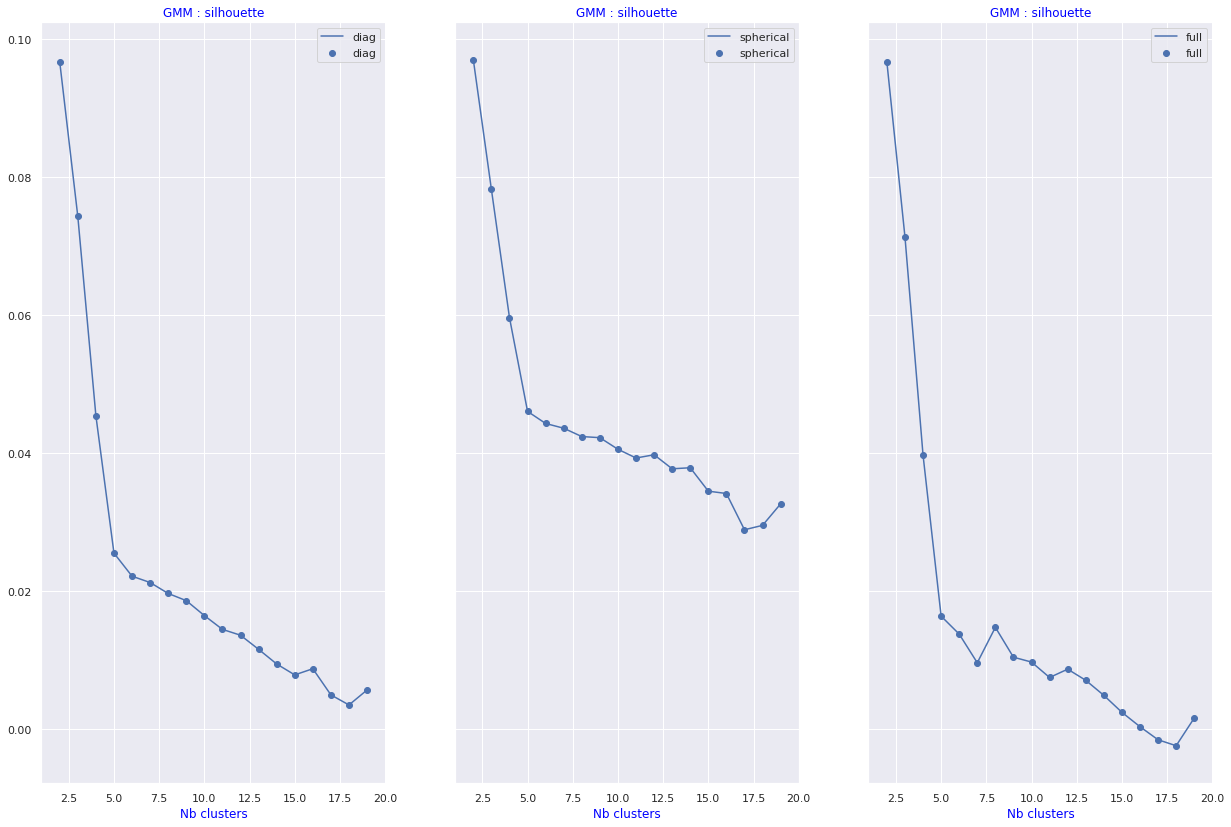

In [463]:
import p5_util_plot
filename = './data/dict_dict_silhouette_score_20_splitted_breeds.dump'
dict_dict_silhouette_score = p5_util.object_load(filename)


p_figsize=(21,14)
areas_raws =1
areas_colums =3
p_title = "GMM : silhouette"
p5_util_plot.gmm_models_plot_silhouette(df_desc, dict_dict_silhouette_score\
, p_figsize, p_title, areas_raws, areas_colums)

(111260, 128)
(111260, 129)
Clusters = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Population cumulée par cluster = 111260
         Count
cluster       
16       14433
15       11516
12        8850
7         7632
6         7430
2         7346
8         5512
1         5332
14        4901
13        4741
9         4552
11        4520
4         4332
17        3777
10        3710
18        3588
0         3305
3         3009
5         2774


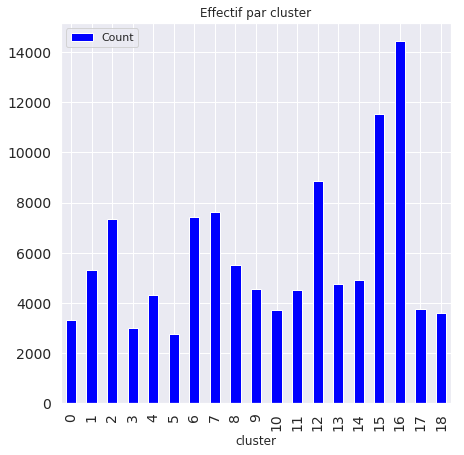

In [464]:
import p5_util
import p5_util_plot

p_covariance_type = 'full'
n_cluster = 20
list_gmm_model = dict_list_gmm_model[p_covariance_type]
for gmm_model in list_gmm_model:
    if n_cluster == gmm_model.n_components:
        break
gmm_model

if 'cluster' in df_desc.columns:
    del(df_desc['cluster'])
    
pred_gmm = gmm_model.predict(df_desc.values)
print(df_desc.shape)
df_desc = p5_util.df_add_cluster(df_desc, pred_gmm)
print(df_desc.shape)
p5_util_plot.plot_cluster_frequency(df_desc)

In [487]:
df_desc.iloc[0]
df_desc.sample()

,cluster,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
109303,5,33.0,28.0,53.0,48.0,27.0,0.0,0.0,1.0,67.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [504]:
oP7_DataBreed.df_desc.shape

oP7_DataBreed._dict_breed_kpdesc[0]
target_raw = 109303
raws = 0
error = 0
for index, (desc, breedname) in oP7_DataBreed._dict_breed_kpdesc.items() :
    #print(desc.shape)
    #break
    try :
        raws += desc.shape[0]
    except AttributeError:
        #print("*** ERROR : index={} / breedname= {} / desc= {}".format(index,breedname,desc))
        error +=1
        raws += 1
    if raws >= target_raw :
        print(index)
        break
    else :
        pass

3682


In [505]:
oP7_DataBreed._dict_breed_kpdesc[index]

(array([[  1.,   0.,   6., ...,   3.,   9.,  25.],
        [ 20.,  42.,  88., ...,  24.,   0.,   0.],
        [ 39.,   2.,   2., ...,   0.,   0.,   0.],
        ...,
        [ 10., 120.,  88., ...,  30.,   1.,   9.],
        [  0.,   0.,   1., ..., 106.,  30.,   2.],
        [  1.,   0.,   3., ...,  31., 112.,  64.]], dtype=float32), 'boxer')

## <font color='blus'>2.4. Training model </font>

### <font color='blus'>2.4.1. Creation of Bag of Features for any image from sample </font>

#### `GMM` model is used

In [624]:
oP7_DataBreed.cluster_model_name='GMM'
oP7_DataBreed.show()

Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (126116, 128)
y train size .................. : (126116,)
X test size ................... : (14013, 128)
y test size ................... : (14013,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)


#### Building a bag of features

In [142]:
import p5_util
import P7_DataBreed

oP7_DataBreed.build_datakp_bof()
oP7_DataBreed.show()

Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (126116, 128)
y train size .................. : (126116,)
X test size ................... : (14013, 128)
y test size ................... : (14013,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)


In [143]:
oP7_DataBreed.df_bof.apply(lambda x: x.dot(x.T), axis=0)

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
dtype: float64

In [144]:
oP7_DataBreed.df_bof

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.040468,0.039807,0.034107,0.022215,0.008790,0.019325,0.038844,0.025044,0.037625,0.027015,0.045492,0.040923,0.007459,0.019200,0.068239,0.036587,0.035367,0.039480,0.030634
1,0.010909,0.032401,0.018348,0.021927,0.042487,0.013385,0.024919,0.015986,0.010045,0.040125,0.013359,0.012036,0.025782,0.028343,0.091732,0.022097,0.016841,0.023506,0.057633
2,0.042755,0.035487,0.041014,0.020484,0.014651,0.015226,0.038925,0.021581,0.024175,0.024631,0.021663,0.022961,0.009081,0.010514,0.046985,0.023184,0.030074,0.023506,0.023884
3,0.004575,0.012652,0.004533,0.005193,0.060068,0.004183,0.005538,0.004796,0.003235,0.007151,0.003972,0.003889,0.013297,0.030171,0.070477,0.007607,0.002646,0.007075,0.026999
4,0.994446,0.985308,0.993193,0.992759,0.599217,0.997212,0.992190,0.996446,0.996462,0.988431,0.995768,0.996787,0.992214,0.983768,0.824467,0.988220,0.993873,0.994543,0.967294
5,0.024281,0.033636,0.024393,0.033467,0.045417,0.011378,0.021499,0.017318,0.016344,0.021056,0.018594,0.015369,0.012648,0.014629,0.087257,0.022822,0.033201,0.020083,0.043095
6,0.016187,0.049065,0.023098,0.037506,0.405827,0.012800,0.022557,0.020515,0.010045,0.039331,0.014622,0.007592,0.027080,0.039314,0.209193,0.033327,0.027187,0.018942,0.090343
7,0.010909,0.034253,0.013168,0.019907,0.071789,0.017401,0.017101,0.017051,0.017195,0.046879,0.017150,0.012962,0.033404,0.045714,0.114105,0.035138,0.021172,0.022136,0.044652
8,0.035189,0.048756,0.040583,0.033467,0.051278,0.029950,0.040880,0.026376,0.029112,0.049660,0.026717,0.027961,0.041349,0.048457,0.132004,0.048179,0.032961,0.037427,0.076324
9,0.017595,0.026230,0.022666,0.024235,0.039557,0.017066,0.023616,0.014121,0.014812,0.031782,0.014983,0.013518,0.032268,0.034743,0.044747,0.030429,0.016601,0.020083,0.049844


In [132]:
np.array(list(oP7_DataBreed._dict_breed_sample.values())).flatten()
np.array(list(oP7_DataBreed._dict_breed_kpdesc.keys()))
np.array(0).shape

()

In [156]:
import P7_DataBreed

oP7_DataBreed.train_test_build(size_test=0.4)
oP7_DataBreed.show()

Path to data directory ........ : ./data/EasyImages
Number of breeds .............. : 12
Total number of images ........ : 913
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 35
Sampling : breeds count ....... : 10
Sampling : images per breed ... : 5
X train size .................. : (21, 19)
y train size .................. : (21,)
X test size ................... : (14, 19)
y test size ................... : (14,)
Clusters models  .............. : dict_keys(['GMM'])
Current cluster model  ........ : GMM
Bag of features dataframe ..... : (35, 19)
Labels from dataframe ......... : (35,)


### <font color='blus'>2.4.2. Training model with supervized algorithm </font>

In [157]:
from sklearn.linear_model import LogisticRegression
import p5_util
import p6_util
import P7_DataBreed

dict_param_grid = {
    #'estimator__C': [ 150,200],#0.011350681536555142,
    #'estimator__C': [ 0.01, 0.1,1.], #0.0
    #'estimator__C': [ 100,150],
    'estimator__C': [ 150], # Best classifier
    'estimator__penalty': ['l2'],
    'n_jobs': [-1]
}
dict_cls_score = dict()
X_train = oP7_DataBreed.X_train
X_test  = oP7_DataBreed.X_test
y_train = oP7_DataBreed.y_train
y_test  = oP7_DataBreed.y_test

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((21, 19), (21,), (14, 19), (14,))

In [163]:
import p6_util
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/bangui/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [165]:
y_pred,y_test

(array([27,  0, 27, 21, 24, 27, 27,  2, 27, 27, 21, 27, 27, 12]),
 array([19,  5,  6,  3, 30, 31, 15,  9, 25, 10, 33, 34, 13,  8]))

# <font color='blus'>5. Key points classification using Random Forest</font>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
nb_estimators=200
rfc = RandomForestClassifier(n_estimators=nb_estimators)

In [ ]:
X_train = np.zeros(128)
y_train = list()
#X_train = X_train.reshape(128)
for (breed, list_kpdesc) in dict_breed_kpdesc.items():
        
    for kp, desc in list_kpdesc :
        X_train = np.vstack((X_train,desc))
        for k in range(0,desc.shape[0]):
            y_train.append(breed)
    #print([desc.shape for kp, desc in list_kpdesc])
    
print(X_train.shape)
y_train = np.array(y_train)
X_train = X_train[1:,:].copy()    
print(X_train.shape, y_train.shape)

In [ ]:
rfc_model = rfc.fit(X_train, y_train)

**Getting a list of images from a breed into sample that do not belongs to sample**

In [ ]:
# Getting an image that does not belong to train dataset

In [ ]:
set(list(dict_breed_imagename.values()))
dict_breed_filename.keys()
#dict_breed_imagename.values()
len(dict_breed_filename['Airedale'])

In [ ]:
len(set(dict_breed_imagename.values()))

In [ ]:
from PIL import ImageOps
import random
import p7_util

def p7_select_breedfilename(dict_breed_filename, breed_name, pos,data_dir = './data/Images/' ):
    ''' Select an image filename from a breed name and an image number.
    Selected image file name does not belongs to values in dictionary given as parameter.
    
    Input : 
        * dict_breed_filename : dictionary structured as following : {breed name : absolute image file-name}
        * breed_name : file name will be selected among this breed name
        * pos : number of images files names to be selected; this is a file name position in the 
        list of file names. If pos=-1, then a random position is computed.
        * data_dir : directory where all breed directories stand.
    Output :
        * Selected image file name 
    '''
    ipos=0
    path_image_filename=''
    if 0 > pos :
        count = len(dict_breed_filename[breed_name])
        pos = random.choice(range(0,count))
    print("Image position = "+str(pos))
    
    for imagename, breed in dict_breed_imagename.items():
        if breed == breed_name :
            trail_dir_name = imagename.split('_')[0]
            breed_dir_name = data_dir+trail_dir_name+'-'+breed
            list_image_dir_name = os.listdir(breed_dir_name)
            for image_dir_name in list_image_dir_name :
                path_image_filename = breed_dir_name+'/'+image_dir_name
                if path_image_filename not in dict_breed_filename[breed]:
                    if(ipos==pos):
                        print('Image dir='+path_image_filename)
                        break
                    ipos +=1
            if len('path_image_filename') >0:
                break
    return path_image_filename

def p7_compute_kpdesc(path_image_filename, resize):
    image_pil = p7_util.p7_pil_image_load(path_image_filename, is_verbose=True, std_size=resize) 
    image_pil = image_pil.resize(resize)
    image_pil_gray =image_pil.convert('L')
    image_pil_gray_equalized = ImageOps.equalize(image_pil_gray) 
    kp, desc = p7_util.p7_gen_sift_features(np.array(image_pil_gray_equalized))
    return kp, desc, image_pil_gray_equalized

In [ ]:
breedfilename1 = p7_select_breedfilename(dict_breed_filename,'clumber',58)
breedfilename2 = p7_select_breedfilename(dict_breed_filename,'clumber',58)
kp1, desc1,image_pil_gray_equalized1 = p7_compute_kpdesc(breedfilename1, resize)
kp2, desc2,image_pil_gray_equalized2 = p7_compute_kpdesc(breedfilename2, resize)

In [ ]:
list_desc=[desc1,desc2]

In [ ]:
z_=plt.imshow(image_pil_gray_equalized1),plt.show()
z_=plt.imshow(image_pil_gray_equalized2),plt.show()

**Predict classification with Random Forest classifier**

In [ ]:
import pandas as pd
list_df = list()
for desc in list_desc :
    pred = rfc.predict(desc)
    df = pd.DataFrame(pred)
    df = df.rename(columns={0:'breed'})
    list_df.append(df)
    #df['breed'].value_counts().plot(kind='bar')

In [ ]:
list_df[0]['breed'].value_counts().plot(kind='bar')

In [ ]:
list_df[1]['breed'].value_counts().plot(kind='bar')

In [ ]:
import cv2

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_L2SQR, crossCheck=True)
# Match descriptors.
matches = bf.match(desc1,desc2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

In [ ]:
type(image1)
image_pil_gray_equalized3 = image_pil_gray_equalized1

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Draw first 10 matches.
image_pil_gray_equalized3 = cv2.drawMatches(np.array(image_pil_gray_equalized1),kp1,np.array(image_pil_gray_equalized2)\
                       ,kp2,matches[:10],np.array(image_pil_gray_equalized3), flags=2)

plt.figure(figsize=(20,10))
z_=plt.imshow(image_pil_gray_equalized3),plt.show()

In [ ]:
import random

breed_count=10
list_breed_sample = list()
sequence = np.arange(0,1000,1)
for sample in range(0, breed_count,1):
    list_breed_sample.append(random.choice(sequence))
list_breed_sample

In [ ]:
random.choice(list_breed_sample)